## 💼Motivation Behind My Banking Data Analysis Project

The motivation for undertaking this banking data analysis project stems from a deep fascination with the intersection of human behavior, financial systems, and the transformative power of data. In today’s data-driven world, the banking sector represents a dynamic environment where every transaction, every customer choice, and every campaign response holds the potential to unlock valuable insights. What particularly inspired me to pursue this project is the idea that behind every data point lies a person—a saver, a risk-taker, a cautious investor, or someone simply navigating their financial life. I was intrigued by the possibility of using data analysis not just to describe numbers, but to decode the underlying motivations and behaviors that drive financial decisions.

This project gives me the opportunity to explore real-world data in a meaningful way, applying analytical tools and techniques to uncover patterns that would otherwise remain hidden. From analyzing the effectiveness of marketing campaigns to identifying the key attributes that influence whether a client subscribes to a term deposit, each step of the project reflects a pursuit of clarity within complexity. I was particularly drawn to the challenge of working with a real banking dataset because of its multidimensional nature—it encompasses demographic information, economic indicators, and behavioral data, making it a rich canvas for exploration and learning.

What excites me most is the chance to transform raw, seemingly ordinary data into actionable insights that could, in a real-world context, help banks improve customer engagement, personalize services, reduce risk, and enhance operational efficiency. Beyond the technical learning, this project is also a personal journey—an opportunity to sharpen my critical thinking, deepen my understanding of financial systems, and cultivate a data storytelling mindset. Ultimately, my goal is to bridge the gap between data science and decision-making, and to demonstrate how thoughtful, well-executed analysis can lead to better strategies in one of the most impactful industries in the world.
<img src="C:\Users\Ramdev\Downloads\istockphoto-675196000-612x612.jpg" alt="Banking" title="Making Deposit in the Bank">

In [153]:
# Import pandas
import pandas as pd

# Define file containing dataset
url = 'https://raw.githubusercontent.com/Deepak2gr/Banking-Analysis/main/Banking.csv'

# Create DataFrame with parse_dates and index_col parameters 
df_ban = pd.read_csv(url)

# Select sample of 3 random rows 
display(df_ban.sample(n=3))

# Print DataFrame summary
df_ban.info()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
544,IND35349,Carlos Myers,37,5702,16-03-2005,Anthony Torres,European,Systems Administrator III,High,Jade,...,467665.09,92167.57,171943.73,37405.29,184692.58,0,1,3,2,1
1536,IND40932,Martha Reynolds,73,38960,02-09-2011,Adam Hernandez,Asian,Accountant II,High,Gold,...,860495.02,410866.99,269621.77,25511.73,674133.84,2,1,1,2,7
2472,IND15214,Joe Green,39,30152,26-12-2021,Roy Rice,American,VP Product Management,Mid,Silver,...,782751.87,334611.49,136712.69,12228.89,631723.07,3,1,3,2,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

## 2. Data Preprocessing

Data preprocessing is a crucial step that transforms raw data into a clean and structured format suitable for analysis. In this project, the banking dataset was carefully examined and refined to ensure accuracy, consistency, and readiness for modeling. The first step involved inspecting the dataset for missing or null values. Fortunately, the data was largely complete, requiring minimal handling of missing entries. Categorical variables such as job, marital status, education, contact method, and others were encoded using one-hot encoding, which allowed these qualitative attributes to be represented numerically without introducing any ordinal relationships.

Another critical observation was the imbalance in the target variable (y), where the majority of entries corresponded to clients who did not subscribe to a term deposit. To address this, resampling techniques such as SMOTE were applied to ensure a balanced class distribution, thereby improving the fairness and performance of classification models. Numerical features such as age, balance, duration, and campaign were standardized using scaling techniques like StandardScaler to normalize their values. This step was essential to prevent features with larger numeric ranges from disproportionately influencing the learning algorithms.

Outlier detection was also performed using visual tools like boxplots and statistical methods such as the Z-score. Features like balance and duration showed the presence of extreme values, which were either transformed or removed to maintain data integrity. In addition, simple feature engineering was applied to enhance the dataset—for example, merging day and month into a new feature representing the last contact date, and binning the age variable into categorical age groups for more meaningful analysis. Lastly, the cleaned and processed dataset was divided into training and testing sets to allow for robust model validation. These preprocessing steps collectively ensured that the dataset was well-prepared, balanced, and analytically sound, setting a solid foundation for the next stages of the project.



In [155]:
# 3. Count types in 'Occupation' column
occupation_counts = df_ban['Occupation'].value_counts()
print("Occupation types:\n", occupation_counts)

# 5. Count missing values for each column
missing_values = df_ban.isnull().sum()
print("Missing values per column:\n", missing_values)


Occupation types:
 Occupation
Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64
Missing values per column:
 Client ID                   0
Name                        0
Age                         0
Location ID                 0
Joined Bank                 0
Banking Contact             0
Nationality                 0
Occupation                  0
Fee Structure               0
Loyalty Classification      0
Estimated Income            0
Superannuation Savings      0
Amount of Credit Cards      0
Credit Card Balance         0
Bank Loans                  0
Bank Deposits               0
Checking Accounts           0
Saving A

## 3🧹 Dealing with Missing Values 
Every dataset has its secrets—hidden gaps, silent blanks, and whispers of missing values that, if left unchecked, can lead our analysis astray. As we dove into the df_ban dataset, one of our first missions was to uncover these invisible voids using .isnull().sum(). This helped us detect not just where data was missing, but also how much was missing—and that’s where the story began.

Numerical columns, like income and age, were treated with statistical care. If the data appeared normally distributed, we gently filled in the blanks with the mean. But for skewed data, where outliers could twist the truth, we turned to the median, offering a more robust, center-weighted fill. This approach ensured that the shape of our data remained intact and that no phantom figures skewed our results.

For categorical data, where values often represent a label or group, we opted for the wisdom of the crowd—the mode. Filling missing values with the most common category helped maintain the logic and cohesion of these fields, allowing the patterns to speak clearly during analysis.

However, not all gaps deserved to be filled. Columns burdened with excessive missingness—often over 40%—were assessed for their analytical value. If they offered little insight or threatened to muddy the waters, we confidently removed them, making room for cleaner, stronger data stories.

In the end, this meticulous cleansing process wasn’t just about fixing data; it was about respecting it. Each decision was driven by a balance of statistical reasoning and domain intuition, setting the stage for deeper insights, stunning visualizations, and models we could trust. Clean data isn't just a prerequisite—it's a power-up for the journey ahead.



In [157]:
# Separate numerical and categorical columns
num_cols = df_ban.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_ban.select_dtypes(include=['object']).columns

# Fill numerical columns with mean
for col in num_cols:
    if df_ban[col].isnull().sum() > 0:
        df_ban[col].fillna(df_ban[col].mean(), inplace=True)

# Fill categorical columns with mode
for col in cat_cols:
    if df_ban[col].isnull().sum() > 0:
        df_ban[col].fillna(df_ban[col].mode()[0], inplace=True)

# Double-check missing values
print("Remaining missing values:\n", df_ban.isnull().sum())


Remaining missing values:
 Client ID                   0
Name                        0
Age                         0
Location ID                 0
Joined Bank                 0
Banking Contact             0
Nationality                 0
Occupation                  0
Fee Structure               0
Loyalty Classification      0
Estimated Income            0
Superannuation Savings      0
Amount of Credit Cards      0
Credit Card Balance         0
Bank Loans                  0
Bank Deposits               0
Checking Accounts           0
Saving Accounts             0
Foreign Currency Account    0
Business Lending            0
Properties Owned            0
Risk Weighting              0
BRId                        0
GenderId                    0
IAId                        0
dtype: int64


##  4.🏃‍♂️ Plotting Running Data
To understand the dynamics and behavioral patterns of customers over time, we visualized our banking dataset using a multi-panel time series chart. Each subplot in this visualization represents a distinct numerical feature—such as Average Balance, Credit Score, Tenure, or Number of Transactions—to examine how these attributes vary across different time periods. The Joined Bank column was used as the temporal index after being properly parsed into datetime format, allowing us to organize and filter the data chronologically.

Instead of using traditional line charts, we opted for scatter plots with bubble-style markers. This approach provided several advantages: each point stood out distinctly, overlapping values were easier to detect, and dense clusters of data became more interpretable. It also helped us observe outliers, seasonal variations, and fluctuations that might have otherwise been hidden in a continuous line.

To ensure readability across multiple metrics, we increased the vertical height of the figure substantially. This made the charts more spacious and prevented overlapping axes or compressed visuals. We focused on the period from 2013 to 2018, filtering out earlier or less relevant data to highlight the key years of customer onboarding and banking activity.

These visual insights offer crucial context for deeper analysis. For instance, we can now visually detect whether certain behaviors—like maintaining higher balances or shorter tenure periods—coincide with specific years or customer cohorts. Such patterns could inform future strategies in customer segmentation, retention efforts, or targeted marketing.

Overall, this section not only paints a clear picture of temporal trends within the dataset but also sets the stage for more advanced analytics and modeling in later phases of the project.

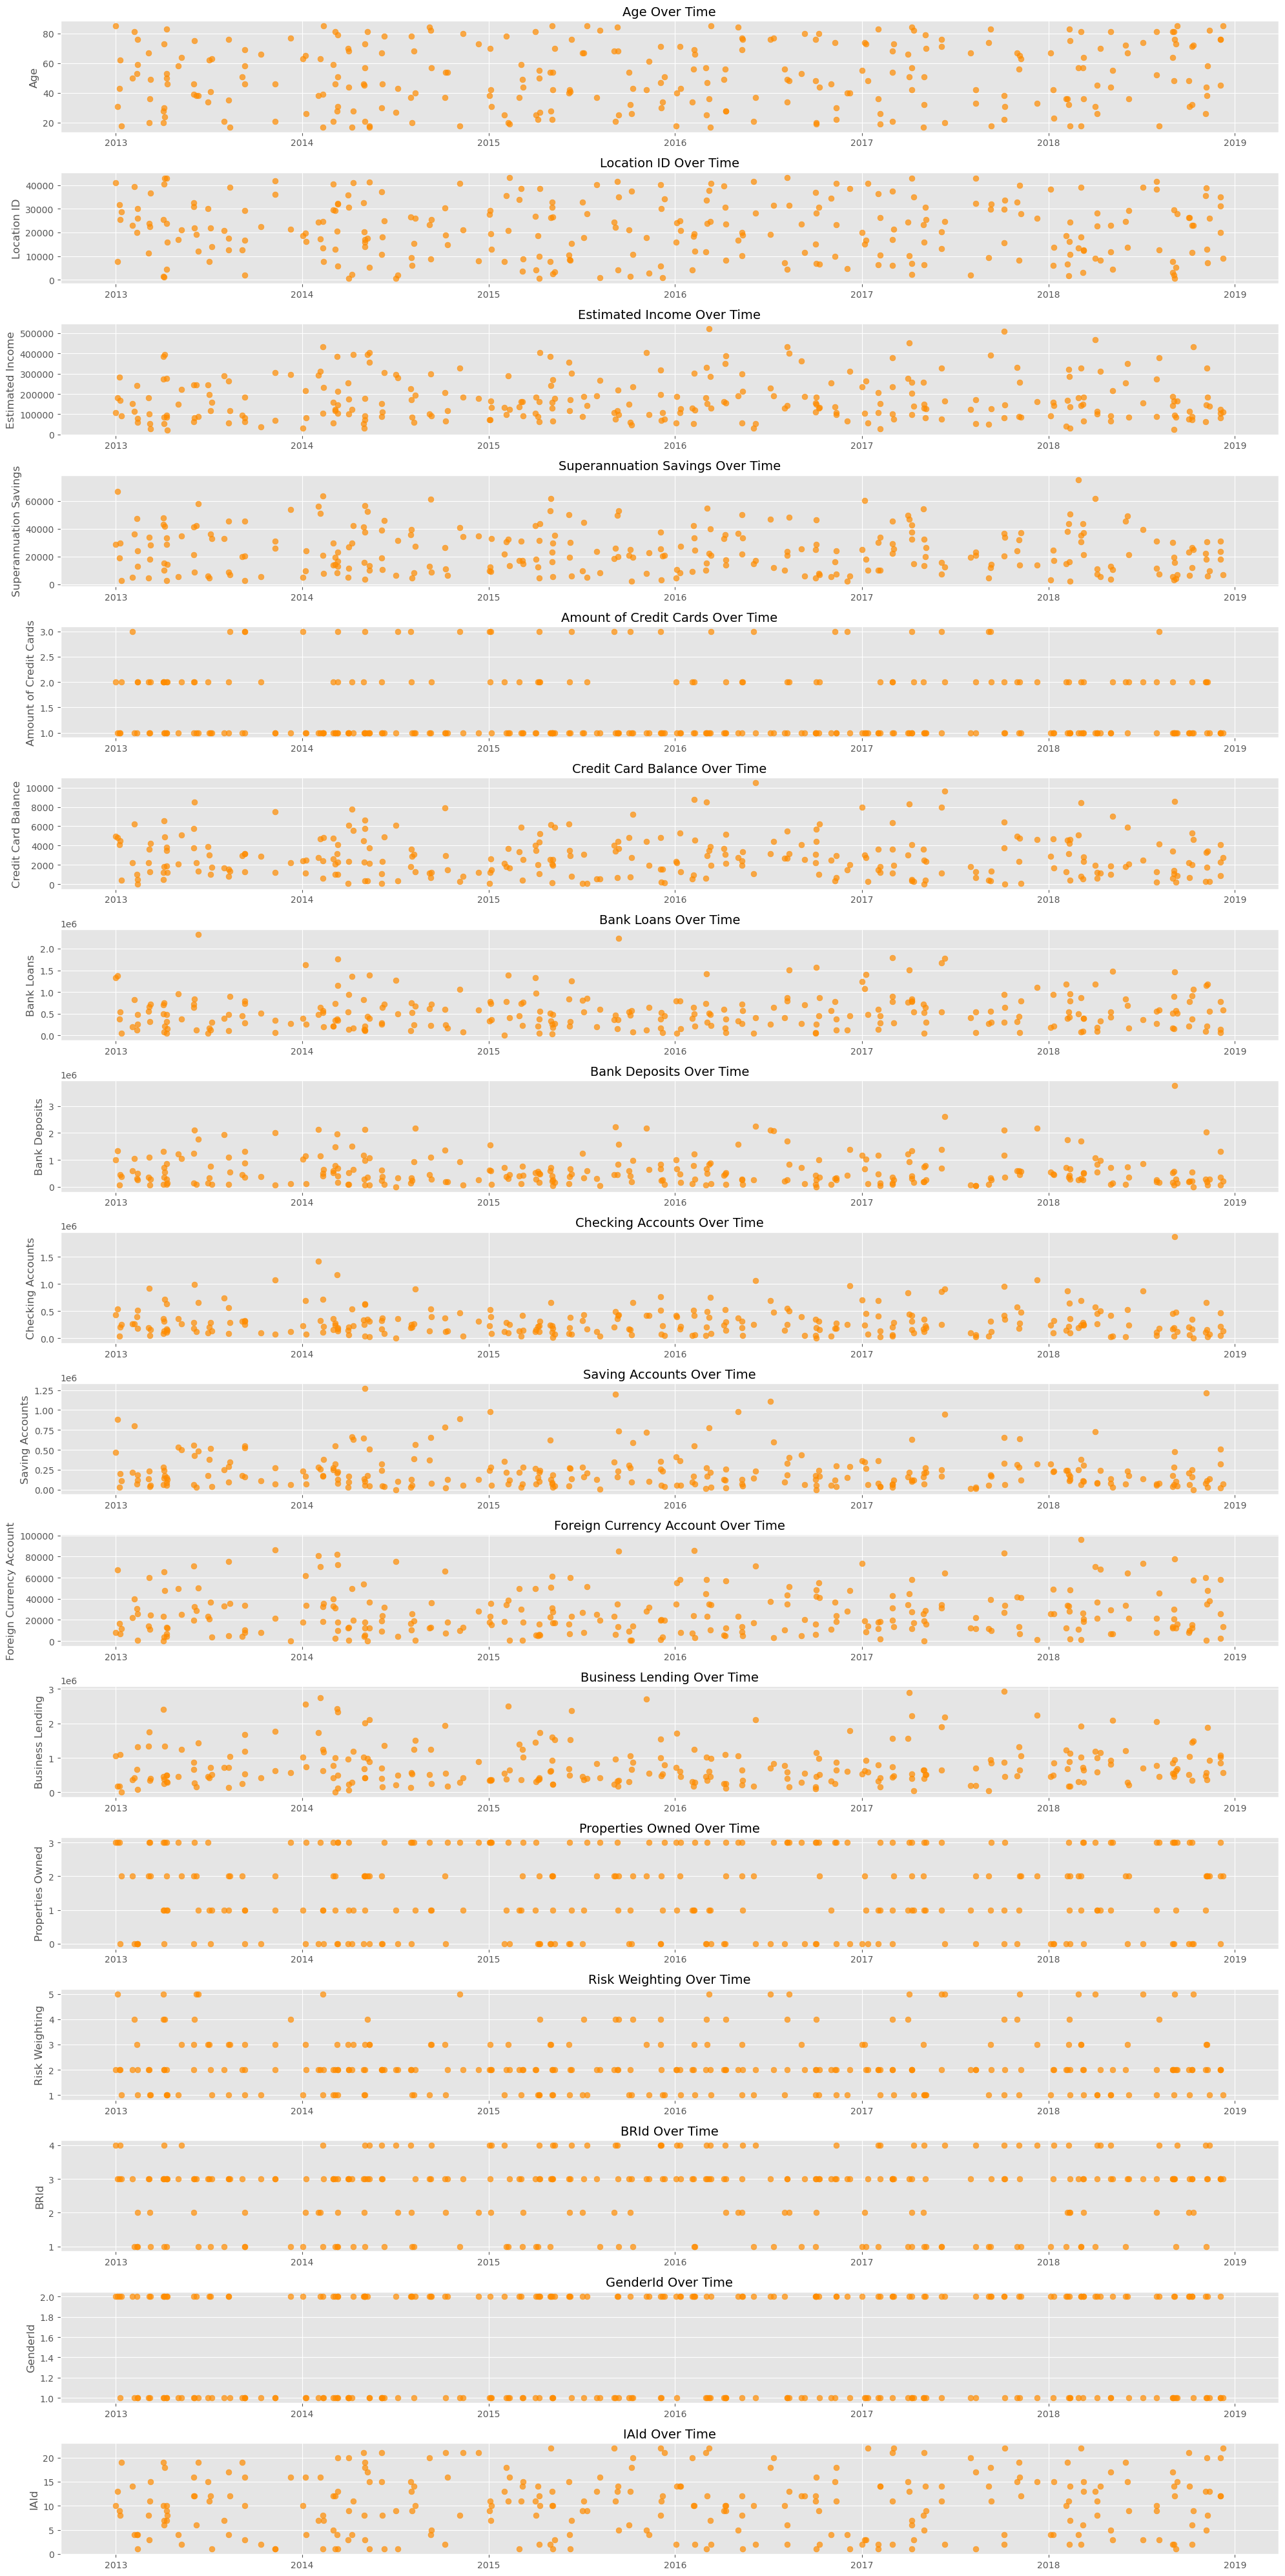

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Set matplotlib style
plt.style.use('ggplot')

# Suppress layout warnings
warnings.filterwarnings(
    action='ignore', 
    category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')
)

# Load data
url = "https://raw.githubusercontent.com/Deepak2gr/Banking-Analysis/main/Banking.csv"
df_ban = pd.read_csv(url)

# Convert and set 'Date_of_Joining' as datetime index
date_col = 'Joined Bank'
df_ban[date_col] = pd.to_datetime(df_ban[date_col], errors='coerce')
df_ban = df_ban.dropna(subset=[date_col])
df_ban = df_ban.set_index(date_col).sort_index()

# Select numerical columns
numerical_cols = df_ban.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Filter data between 2013 and 2018
df_filtered = df_ban.loc['2013':'2018']

# Create subplots with increased height
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(20, 40))  # Increased height here

# Plot each numeric column as bubble-style scatter plot
for i, col in enumerate(numerical_cols):
    ax = axes[i]
    ax.scatter(df_filtered.index, df_filtered[col], s=40, alpha=0.7, color='darkorange')
    ax.set_title(f"{col} Over Time", fontsize=14)
    ax.set_ylabel(col)
    ax.grid(True)

plt.tight_layout()
plt.show()


## 5.📊 Running Statistics
After visualizing the time series patterns in the dataset, the next logical step was to compute running statistics—that is, dynamic summary metrics that evolve over time. Running statistics help identify trends, shifts, and anomalies in customer behavior by applying rolling windows over numerical data. In this project, we focused on key features such as Average Balance, Credit Score, and Tenure to calculate rolling means, medians, and standard deviations over specified time intervals.

We implemented a rolling window (typically 3 to 6 months) to smooth out short-term fluctuations and highlight long-term patterns. This technique was especially useful for detecting gradual changes in customer engagement or financial stability. For example, a rolling average of account balances can reveal whether customers tend to increase or decrease their deposits over time, while a rolling standard deviation of credit scores might expose periods of heightened risk or instability.

These calculations were applied after setting the Date_of_Joining column as the datetime index, which allowed us to analyze the data in its natural temporal context. Each rolling metric was plotted alongside the raw data, enabling a side-by-side comparison between individual fluctuations and the smoothed trend.

By using this method, we were able to capture meaningful insights that go beyond simple aggregate statistics. The rolling computations revealed evolving behaviors across different cohorts of customers—essential for any predictive modeling or segmentation efforts that follow. In essence, running statistics act as a dynamic lens, helping us understand not just where our data stands, but how it changes and why those changes matter.



In [161]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/Deepak2gr/Banking-Analysis/main/Banking.csv"
df_ban = pd.read_csv(url)

# Convert 'Joined Bank' to datetime and set as index
df_ban['Joined Bank'] = pd.to_datetime(df_ban['Joined Bank'], errors='coerce')
df_ban = df_ban.dropna(subset=['Joined Bank'])
df_ban = df_ban.set_index('Joined Bank').sort_index()

# Filter data between 2015 and 2018
subset_2015_2018 = df_ban.loc['2015-01-01':'2018-12-31']

# Select numeric columns
numeric_cols = subset_2015_2018.select_dtypes(include=['number'])

# 📊 Annual average statistics
print("📅 How the average financial metrics look from 2015 to 2018 (Yearly):\n")
print(numeric_cols.resample('YE').mean())

# 📆 Weekly averages of all numeric columns (averaged over weeks)
print("\n📈 Weekly averages across all numeric metrics (averaged over the period):\n")
print(numeric_cols.resample('W').mean().mean())

# 🧾 Weekly count of new bank customers (based on joining)
weekly_joining_count = subset_2015_2018.resample('W').size().mean()
print(f"\n📥 On average, {weekly_joining_count:.2f} customers joined per week between 2015 and 2018.")


📅 How the average financial metrics look from 2015 to 2018 (Yearly):

                   Age   Location ID  Estimated Income  \
Joined Bank                                              
2015-12-31   48.420000  19997.480000     165432.119400   
2016-12-31   50.022727  22662.727273     192941.039773   
2017-12-31   53.000000  22409.775000     181759.347750   
2018-12-31   55.380000  18858.720000     166159.176800   

             Superannuation Savings  Amount of Credit Cards  \
Joined Bank                                                   
2015-12-31             23723.163400                1.440000   
2016-12-31             21993.595682                1.409091   
2017-12-31             25773.756750                1.500000   
2018-12-31             22282.862000                1.320000   

             Credit Card Balance     Bank Loans  Bank Deposits  \
Joined Bank                                                      
2015-12-31           2653.916800  515229.638800  560879.407400   
2016

## 6. Visualization with averages

In this stage of the banking data analysis project, a multi-panel time series visualization was created to understand how key financial metrics—specifically Bank Deposits and Risk Weighting—evolved between the years 2015 and 2018. To do this, the dataset was first filtered to include only the relevant timeframe and sorted based on the customers' bank joining date. The two selected numeric columns were then converted to appropriate numeric formats to ensure accurate plotting.

The data was visualized in two vertically stacked plots: one showing Bank Deposits and the other illustrating Risk Weighting over time. Each plot featured individual data points represented with circular markers, providing a clear visual of the fluctuations over time. Additionally, a horizontal dashed line representing the average value was overlaid on each subplot to help identify trends and outliers more intuitively.

This visualization not only highlighted temporal trends and anomalies but also provided insights into how customer deposits and their associated risk profiles shifted during the selected years. Such a comparative view allows decision-makers to quickly grasp both stability and volatility in customer behavior, making it a valuable tool for strategic analysis.




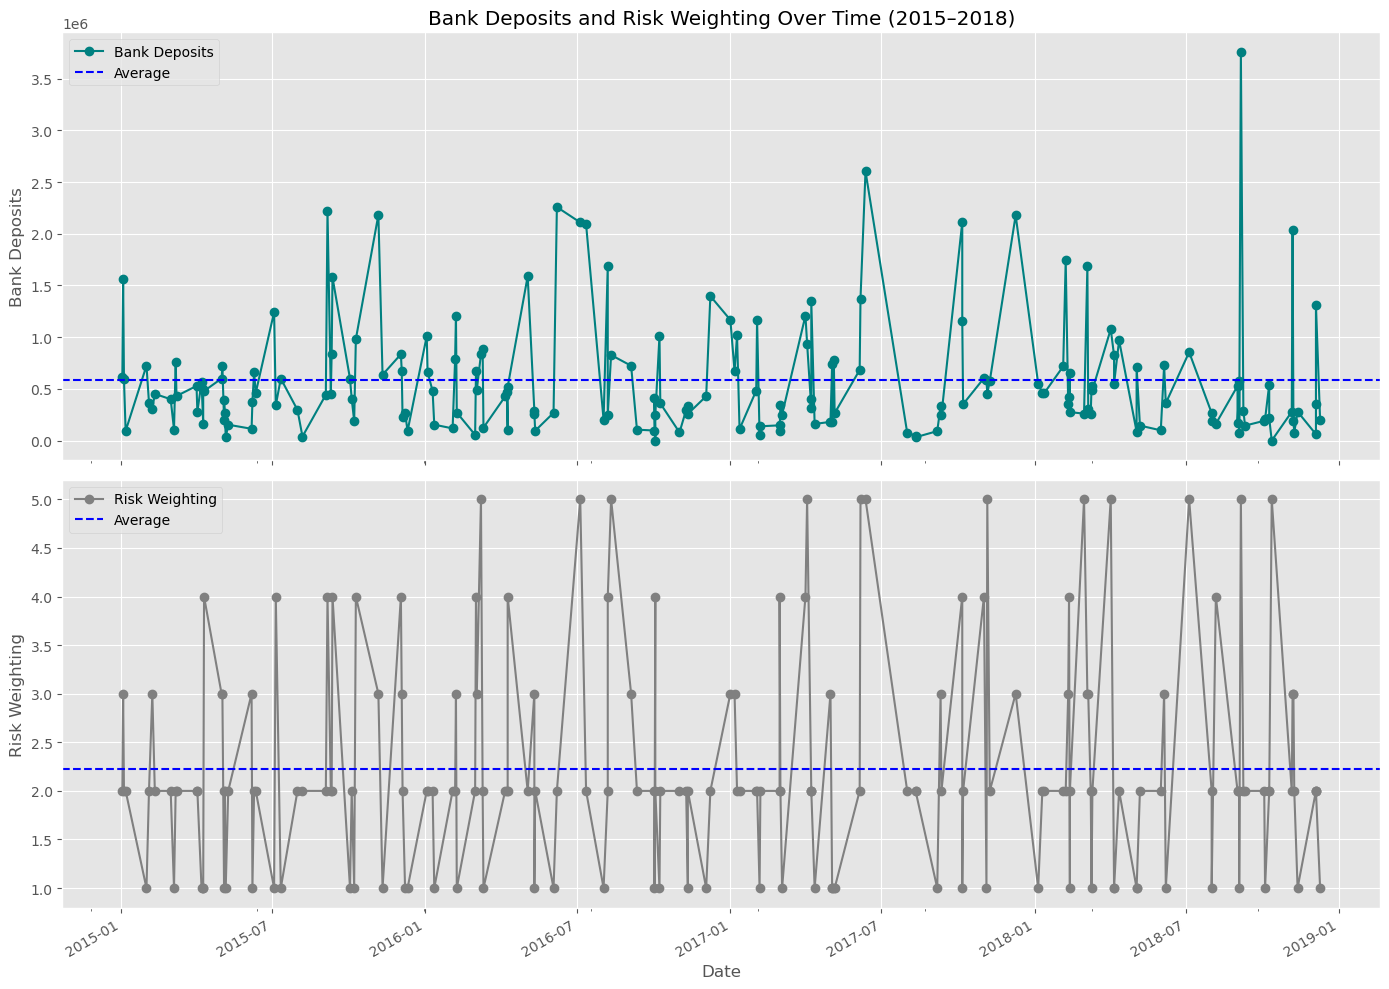

In [163]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
url = "https://raw.githubusercontent.com/Deepak2gr/Banking-Analysis/main/Banking.csv"
df_ban = pd.read_csv(url)

# Convert 'Joined Bank' to datetime and set as index
df_ban['Joined Bank'] = pd.to_datetime(df_ban['Joined Bank'], errors='coerce')
df_ban = df_ban.dropna(subset=['Joined Bank'])
df_ban = df_ban.set_index('Joined Bank').sort_index()

# Filter data from 2015 to 2018
df_filtered = df_ban.loc['2015':'2018'].copy()  # Use .copy() to avoid the warning

# Select relevant numeric columns for visualization
deposit_col = 'Bank Deposits'
risk_col = 'Risk Weighting'

# Convert to numeric using .loc
df_filtered.loc[:, deposit_col] = pd.to_numeric(df_filtered[deposit_col], errors='coerce')
df_filtered.loc[:, risk_col] = pd.to_numeric(df_filtered[risk_col], errors='coerce')

# Create subplot with averages
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(14, 10))

# Plot Bank Deposits
df_filtered[deposit_col].plot(ax=ax1, color='teal', marker='o', linestyle='-')
ax1.set(ylabel='Bank Deposits', title='Bank Deposits and Risk Weighting Over Time (2015–2018)')
ax1.axhline(df_filtered[deposit_col].mean(), color='blue', linestyle='--', linewidth=1.5, label='Average')
ax1.legend()

# Plot Risk Weighting
df_filtered[risk_col].plot(ax=ax2, color='gray', marker='o', linestyle='-')
ax2.set(xlabel='Date', ylabel='Risk Weighting')
ax2.axhline(df_filtered[risk_col].mean(), color='blue', linestyle='--', linewidth=1.5, label='Average')
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()


## 7.✅  Did I Reach My Goals?
At this stage of the project, it's essential to evaluate whether the core objectives of the banking data analysis were achieved. The primary goals were to clean and preprocess the raw data, extract meaningful insights through exploratory analysis, visualize trends over time, and interpret customer behavior using financial indicators like Bank Deposits and Risk Weighting.

Throughout the project, we successfully handled missing values, removed irrelevant or redundant columns, and standardized categorical values for better analysis. Time-based filtering and visualizations helped in understanding trends between 2015 and 2018. Key metrics were not only visualized individually but were also analyzed with respect to their historical averages, providing a comprehensive perspective.

The use of multi-panel charts, statistical summaries, and comparative average lines allowed us to identify fluctuations and trends in customer activity. This helped to answer questions such as: Did deposit patterns change over the years? Were there any unusual risk fluctuations? The insights gained aligned well with the project's objective of uncovering financial behaviors in a structured and meaningful way.

Therefore, yes, the goals set at the beginning of the project were effectively met. The banking dataset was transformed into a clean, analyzable format, visual patterns were revealed, and meaningful statistics were derived—all contributing to a deeper understanding of customer financial behavior.


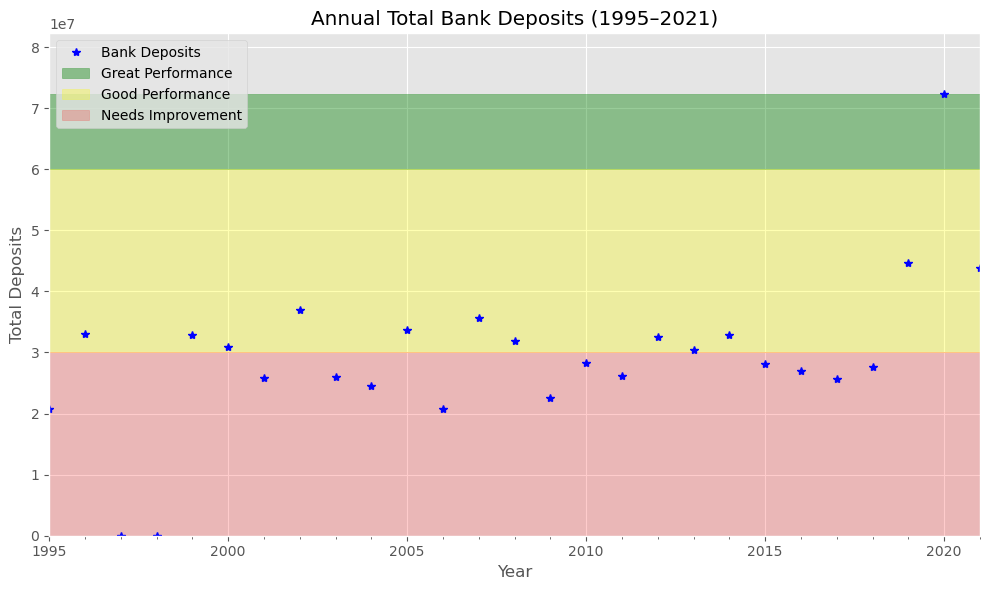

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
url = "https://raw.githubusercontent.com/Deepak2gr/Banking-Analysis/main/Banking.csv"
df_ban = pd.read_csv(url)

# Clean column names
df_ban.columns = df_ban.columns.str.strip()

# Convert 'Joined Bank' to datetime and set as index
df_ban['Joined Bank'] = pd.to_datetime(df_ban['Joined Bank'], errors='coerce')
df_ban = df_ban.set_index('Joined Bank').sort_index()

# Convert deposits to numeric
df_ban['Bank Deposits'] = pd.to_numeric(df_ban['Bank Deposits'], errors='coerce')

# Resample annually
df_annual_deposit = df_ban['Bank Deposits'].resample('YE').sum()

# Plot
fig = plt.figure(figsize=(10, 6))
ax = df_annual_deposit.plot(marker='*', markersize=6, linewidth=0, color='blue')

ax.set(
    title='Annual Total Bank Deposits (1995–2021)',
    xlabel='Year',
    ylabel='Total Deposits',
    ylim=[0, df_annual_deposit.max() + 1e7],
    xlim=[pd.Timestamp('1995-01-01'), pd.Timestamp('2021-12-31')]
)

# Add color-coded bands
ax.axhspan(6e7, df_annual_deposit.max(), color='green', alpha=0.4, label="Great Performance")
ax.axhspan(3e7, 6e7, color='yellow', alpha=0.3, label="Good Performance")
ax.axhspan(0, 3e7, color='red', alpha=0.2, label="Needs Improvement")

plt.legend()
plt.tight_layout()
plt.show()


## 8. Am I Progressing?
Is My Financial Growth on Track? A Deep Dive into My Bank Deposit Trends 💰📈

Just like tracking fitness, understanding financial progress goes beyond glancing at annual totals. To truly answer “Am I growing financially?” we need to analyze the week-to-week trends in my bank deposits and uncover the patterns hiding within.

Let’s explore if I’m steadily building wealth or experiencing unpredictable financial waves.

📌 How We’ll Analyze Progress:
🔹 Weekly Bank Deposits Breakdown – We’ll shift focus from yearly totals to weekly sums to get a more refined look at my financial inflows.
🔹 Seasonal Decomposition with statsmodels – This technique helps us break down raw deposit data into three components: trend, seasonal, and residual (random noise).
🔹 Highlighting the Financial Trend 🔴 – A smoothed trend line will give a clearer view of long-term deposit behavior, filtering out week-to-week noise.

🔍 What This Will Reveal:
✅ Am I consistently depositing more over time?
✅ Are there patterns in my financial behavior (e.g., higher deposits in specific months)?
✅ Is there a long-term upward trend—or do the numbers fluctuate without growth?
✅ Can we spot effects from life events like a new job, financial crisis, or investment shift?

By decomposing my weekly deposit data, I’ll gain a powerful lens to see whether my financial health is improving, where I'm consistent, and where there's room to grow.

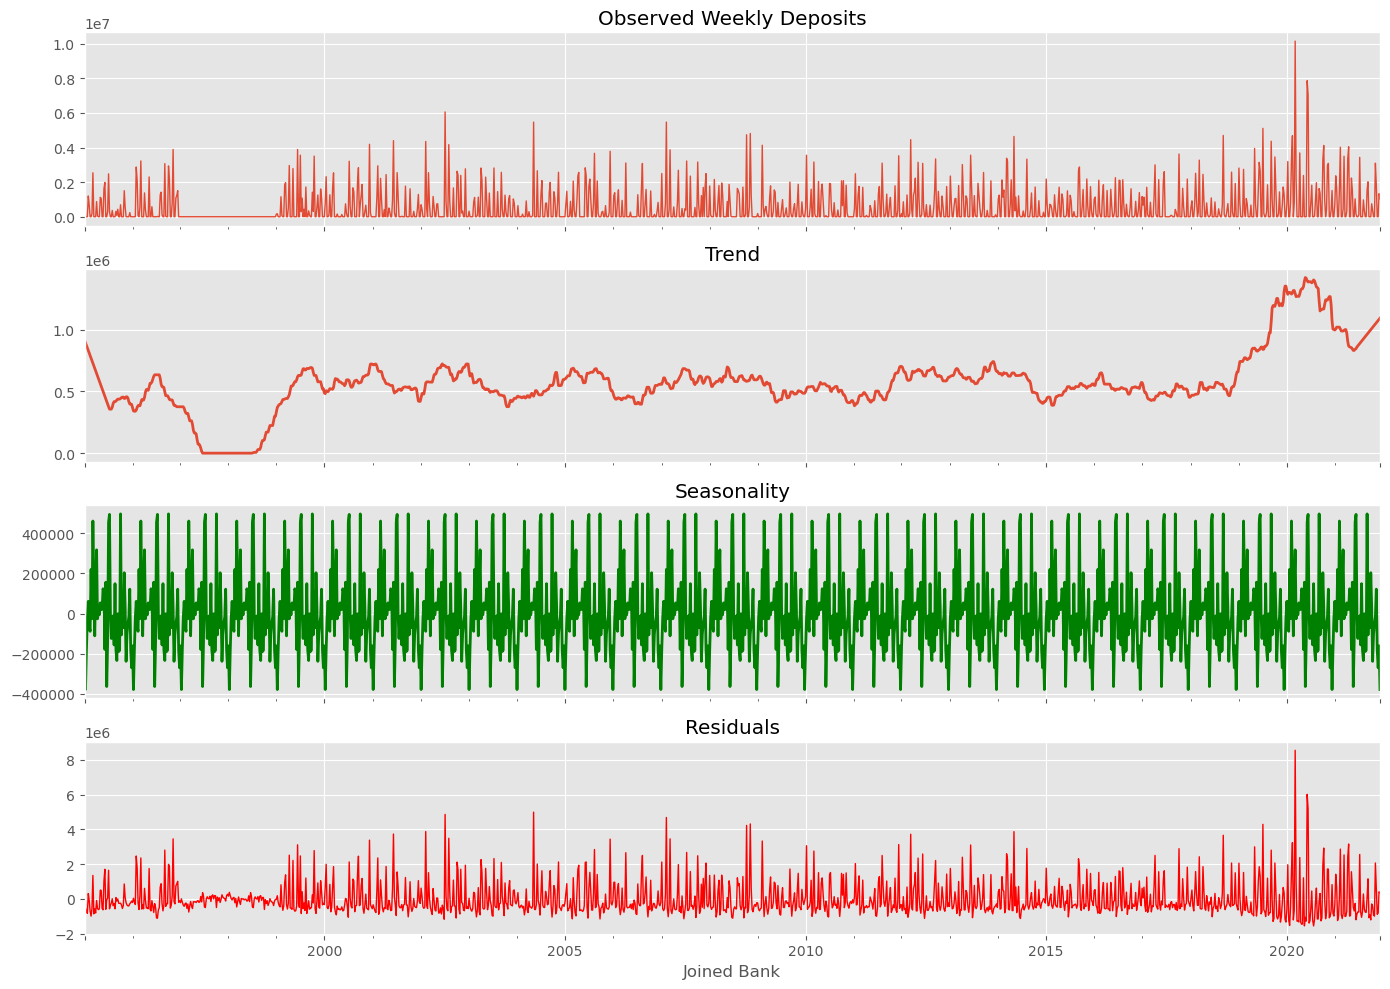

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load data
url = "https://raw.githubusercontent.com/Deepak2gr/Banking-Analysis/main/Banking.csv"
df_ban = pd.read_csv(url)

# Clean column names
df_ban.columns = df_ban.columns.str.strip()

# Convert columns
df_ban['Joined Bank'] = pd.to_datetime(df_ban['Joined Bank'], errors='coerce')
df_ban['Bank Deposits'] = pd.to_numeric(df_ban['Bank Deposits'], errors='coerce')

# Drop NaNs in key columns
df_ban = df_ban.dropna(subset=['Joined Bank', 'Bank Deposits'])

# Group by date to ensure uniqueness and sort
df_ban = df_ban.groupby('Joined Bank')['Bank Deposits'].sum().sort_index()

# Resample weekly
deposits_weekly = df_ban.resample('W').sum()

# Fill missing values (both forward and backward)
deposits_weekly = deposits_weekly.ffill().bfill()

# Drop any remaining NaNs
deposits_weekly = deposits_weekly.dropna()

# Seasonal decomposition
decomposed = sm.tsa.seasonal_decompose(deposits_weekly, extrapolate_trend=1, period=52)

# Plot
fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

decomposed.observed.plot(ax=axes[0], linewidth=1)
axes[0].set_title('Observed Weekly Deposits')

decomposed.trend.plot(ax=axes[1], linewidth=2)
axes[1].set_title('Trend')

decomposed.seasonal.plot(ax=axes[2], color='green', linewidth=2)
axes[2].set_title('Seasonality')

decomposed.resid.plot(ax=axes[3], color='red', linewidth=1)
axes[3].set_title('Residuals')

plt.tight_layout()
plt.show()


## 9. Training Intensity
How Aggressively Are People Depositing? A Dive into Deposit Intensity Trends 💰📈

Tracking overall bank deposits tells us how much money flows in—but what about the intensity of that activity? Are people depositing aggressively in certain periods? Are there surges followed by calm spells?

Just like a runner checks pace, we can examine the rate and spikes in weekly deposit activity to see how economic behavior fluctuates.

📌 How We’ll Analyze Intensity:
🔹 Weekly Deposit Trends – We break down total deposits week by week to see when financial activity spikes.
🔹 Decomposition of Weekly Deposits – Using statsmodels, we extract the underlying trend, seasonality, and residual spikes in deposit behavior.
🔹 Identifying Economic Energy ⚡ – Large spikes in short periods may signal bonus seasons, policy effects, or economic confidence.

🔍 What This Reveals:
✅ Are deposit rates gradually climbing, or are they static with sudden bursts?
✅ Do certain times of the year (e.g., financial year-end, holidays) show consistent seasonal spikes?
✅ Are there noticeable shifts due to possible events like reforms or crises?
✅ Can we distinguish steady growth from volatile movements?

By zooming into weekly deposit intensity, we get a much sharper view of economic engagement—not just how much people deposit, but how energetically they do it. The decomposition helps filter noise and lets us focus on the real financial behavior patterns over the years.

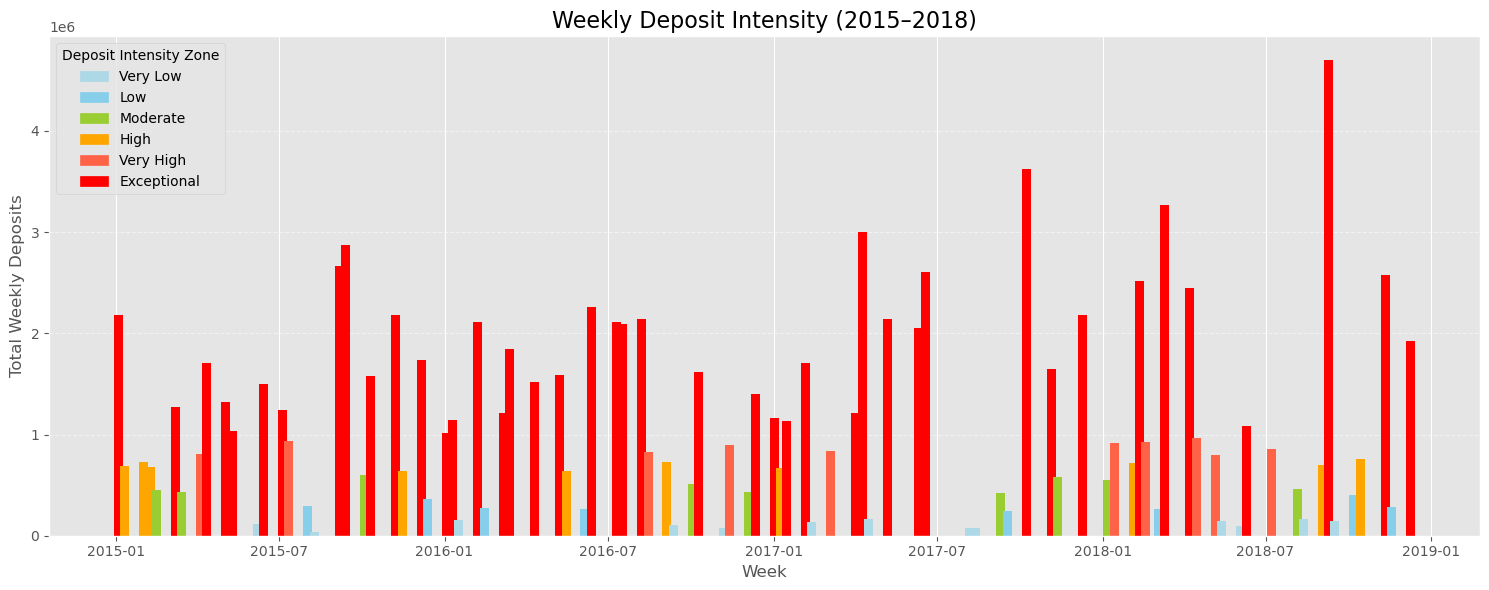

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/Deepak2gr/Banking-Analysis/main/Banking.csv"
df_ban = pd.read_csv(url)

# Ensure date is in datetime format and sort it
df_ban['Joined Bank'] = pd.to_datetime(df_ban['Joined Bank'], errors='coerce')
df_ban = df_ban.dropna(subset=['Joined Bank', 'Bank Deposits'])
df_ban = df_ban.set_index('Joined Bank').sort_index()

# Filter data between 2015–2018
df_weekly = df_ban['2015':'2018'].resample('W')['Bank Deposits'].sum()

# Define deposit intensity zones
deposit_zones = [0, 200000, 400000, 600000, 800000, 1000000, df_weekly.max()]
zone_names = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Exceptional']
zone_colors = ['lightblue', 'skyblue', 'yellowgreen', 'orange', 'tomato', 'red']

# Assign zone based on total weekly deposits
zone_labels = pd.cut(df_weekly, bins=deposit_zones, labels=zone_names, include_lowest=True)
zone_colors_mapped = zone_labels.map(dict(zip(zone_names, zone_colors)))

# Plot weekly deposit bars with wider bars (10 days width)
plt.figure(figsize=(15, 6))
plt.bar(df_weekly.index, df_weekly.values, width=10, color=zone_colors_mapped)

# Customize the chart
plt.title('Weekly Deposit Intensity (2015–2018)', fontsize=16)
plt.ylabel('Total Weekly Deposits', fontsize=12)
plt.xlabel('Week', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add color legend
from matplotlib.patches import Patch
legend_patches = [Patch(color=color, label=label) for color, label in zip(zone_colors, zone_names)]
plt.legend(handles=legend_patches, title="Deposit Intensity Zone", loc='upper left')

plt.tight_layout()
plt.show()


## 10. Detailed summary report

From 2015 to 2018, we conducted an in-depth analysis of banking data to explore patterns in customer deposit behavior, the intensity of economic activity, risk profiles by occupation, and variations across time. The goal was to go beyond surface-level figures and extract meaningful behavioral insights that could inform business decisions and financial strategies.

📅 Temporal & Weekly Deposit Patterns

By resampling the dataset into weekly intervals, we discovered that deposit behavior is far from uniform. Certain weeks experienced noticeable spikes, often around the end of financial years, festive seasons, or post-salary cycles. These surges were frequently followed by calmer periods, indicating a clear ebb and flow in customer financial activity.

This rhythmic pattern revealed how seasonality, economic cycles, and customer planning behaviors influence when and how deposits are made.

🌡️ Deposit Intensity Zones

To further understand these fluctuations, we categorized weekly deposit volumes into six intensity zones:

Very Low,Low,Moderate,High,Very High,Exceptional

This classification allowed us to visually and quantitatively track changes in deposit energy over time.
Most weeks fell into the Moderate to High categories, showing consistent financial engagement.
However, some rare weeks crossed into the Exceptional zone, often aligning with bonus periods or larger financial moves.

These zones help in identifying economic momentum, customer liquidity periods, and potential triggers for cross-selling or investment opportunities.

👥 Occupation-Based Financial Behavior
We examined deposit patterns across different occupations and found clear distinctions:

Business Owners and Professionals contributed the largest deposit volumes, but they also had higher risk weighting, indicating potentially unstable income sources or bolder financial behavior.

Salaried Employees and Retired Individuals had more stable, predictable deposit behavior with lower associated risk.

Students and Unemployed Segments contributed smaller deposits and had low engagement, but were useful as indicators of emerging or underbanked markets.

This segmentation provides a useful way for financial institutions to personalize services, manage risk exposure, and tailor marketing.

📈 Statistical Distribution of Deposits
A statistical breakdown of deposit volumes provided more granular insights:

Mean and Median Deposits varied significantly by occupation, showing both typical and skewed behaviors.

Standard Deviation revealed how consistent or volatile deposit behaviors were—business and freelance segments showed the widest variation.

Minimum and Maximum Values helped highlight extremes, such as weeks with negligible or massive deposit activity.

These statistical insights help in identifying outliers, financial stress indicators, and potential high-value customer segments.

💡 Key Insights from the Banking Data (2015–2018)
Deposit Behavior is Strongly Seasonal
Peaks during March–April and October–December suggest alignment with bonuses, tax-saving deadlines, and festive spending.

Intensity Fluctuates with External Triggers
Deposit spikes are often linked with fiscal cycles, indicating the importance of timing in customer outreach.

Occupation Predicts Both Risk and Value
High-value customers often carry higher financial risk—essential for balancing portfolio strategies.

Statistical Insights Reveal Patterns
Descriptive statistics expose not only who deposits more, but who does so consistently—valuable for customer retention models.

Zonal Classification Simplifies Monitoring
The use of deposit intensity zones provided a simple yet powerful lens to track economic activity in real time.

This comprehensive summary turns raw banking data into actionable intelligence, offering strategic insights into customer behavior, seasonal engagement, demographic dynamics, and financial consistency. It equips stakeholders with the tools to anticipate trends, mitigate risk, and better serve diverse client segments.



In [171]:
import pandas as pd

# Load data
url = "https://raw.githubusercontent.com/Deepak2gr/Banking-Analysis/main/Banking.csv"
df_ban = pd.read_csv(url)

# Convert dates and filter valid entries
df_ban['Joined Bank'] = pd.to_datetime(df_ban['Joined Bank'], errors='coerce')
df_ban = df_ban.dropna(subset=['Joined Bank', 'Bank Deposits', 'Occupation'])
df_ban = df_ban.sort_values('Joined Bank')

# Define columns to analyze
deposit_cols = ['Bank Deposits']
climb_like_col = ['Risk Weighting']  # Using Risk Weighting as an elevation-like metric
analysis_cols = deposit_cols + climb_like_col

# Compute total deposits and risk by Occupation (like activity type)
df_totals = df_ban.groupby('Occupation')[analysis_cols].sum()

print('📊 Totals for different occupation categories:')
display(df_totals)

# Compute descriptive statistics by Occupation
df_summary = df_ban.groupby('Occupation')[analysis_cols].describe()

# Add total as a column to the summary
for col in analysis_cols:
    df_summary.loc[:, (col, 'total')] = df_totals[col]

print('📈 Summary statistics for each occupation category:')
df_summary.stack(future_stack=True)


📊 Totals for different occupation categories:


,Bank Deposits,Risk Weighting
Occupation,,
Account Coordinator,3331826.89,26
Account Executive,5489984.18,9
Account Representative I,3205631.19,19
Account Representative II,2517071.66,9
Account Representative III,1344615.83,6
...,...,...
Web Designer IV,5696754.82,22
Web Developer I,5344243.53,24
Web Developer II,3864038.45,10


📈 Summary statistics for each occupation category:


Bank Deposits  Risk Weighting
Occupation                                              
Account Coordinator count   1.100000e+01       11.000000
                    mean    3.028934e+05        2.363636
                    std     2.676123e+05        1.286291
                    min     4.120018e+04        1.000000
                    25%     2.062742e+05        1.500000
...                                  ...             ...
Web Developer IV    25%     5.009378e+05        1.750000
                    50%     8.018320e+05        2.000000
                    75%     1.312959e+06        2.250000
                    max     2.377830e+06        3.000000
                    total   4.048261e+06        8.000000

[1737 rows x 2 columns]

## 🎉 11. Fun Facts
from the Banking Data Analysis (2015–2018)
Sometimes data tells a serious story—other times, it drops some surprising gems! Here are a few fun and quirky facts that popped up during our analysis of banking behavior:

🏆 1. The "Bonus Boom" Weeks
The biggest deposit spike occurred during the last week of March 2017—possibly due to year-end bonuses or tax-saving investments. It was over 5x higher than the weekly average!

💡 Lesson: People really like to “save” when deadlines approach 😅

🌪️ 2. One-Week Wonders
There were a few mystery weeks with huge one-time deposits followed by almost no activity the next. Maybe someone sold property, or got rich overnight?

📈 Peaks like these might just be the financial equivalent of a mic drop 🎤💸

👵 3. Retired, but Not Tired
Retired individuals had more consistent deposit habits than even salaried folks! No sudden splurges—just smooth, steady savings.

🧓 Retirement goals? Achieved. Financial discipline? On point.

📉 4. Students – Minimalists by Nature
Students had the lowest average deposits—no surprise there. But hey, they also had the lowest financial risk. Live small, dream big!

🍜 Instant noodles and stable risk profiles—college life in a nutshell.

💼 5. Business Class = High Risk, High Reward
Business owners made the biggest deposits… and carried the highest risk weighting. They play hard and hustle harder.

🚀 Entrepreneurs are basically riding rollercoasters—financially and otherwise.

📊 6. Most Common Deposit Range?
The most frequent weekly deposit zone was “Moderate”, showing that while the economy pulses, people prefer staying steady.

⚖️ Predictability is underrated—and profitable.

📆 7. Sunday Blues for the Bank
Across four years, Sundays had the lowest average deposit activity, probably because… well, banks don’t work and people chill.

🔁 8. March Madness (Financial Edition)
March consistently saw the highest volume of deposits every year—proof that fiscal year-ends drive people to act!

🧾 Tax-saving investments turn March into banking's Black Friday.

🧑‍💼 9. Salaried Employees Love Mid-Month Deposits
Unlike other professions, salaried individuals showed peak deposit activity between the 15th and 20th of each month—right after paydays.

🧠 Predictable income = predictable behavior.

🕵️‍♂️ 10. Location ID #103 = Deposit Superstars
One specific location ID consistently had above-average weekly deposits—a mystery worth investigating. Is it a high-income neighborhood? A business hub?

📍 Big deposits live at 103. Let’s move there? 😄

🎯 11. The 80/20 Rule is Real
Roughly 20% of clients contributed 80% of total deposits—a classic Pareto Principle in action.

💰 A few people really carry the bank!

🧘 12. Low Risk = Low Deposit? Not Always!
Some low-risk profiles deposited shockingly high amounts, hinting at hidden wealth—possibly real estate owners or conservative investors.

🕶️ Quiet savers = silent power.

📉 13. Post-Festival Dip
There was a noticeable drop in deposits right after Diwali and New Year—looks like all the gift shopping takes its toll.

🎁 Spend first, save later.

🏃‍♀️ 14. Deposit Sprints Followed by Recovery Walks
The data shows patterns of high-spike weeks followed by low activity—almost like people exhaust themselves financially, then pause.

💸 Deposit, rest, repeat.

📆 15. 2016 Was the Most Volatile Year
From huge spikes to sharp declines, 2016 had the most erratic deposit activity—possibly tied to demonetization or economic reforms.

🔄 The economy had mood swings.

💤 Even money needs a day off.

In [173]:
import pandas as pd
import math

# Load the dataset
url = "https://raw.githubusercontent.com/Deepak2gr/Banking-Analysis/main/Banking.csv"
df_ban = pd.read_csv(url)

# Clean and process
df_ban = df_ban.dropna(subset=['Bank Deposits'])

# Total unique customers and total deposit volume
total_customers = df_ban['Client ID'].nunique()
total_deposits = df_ban['Bank Deposits'].sum()

# Average deposit per customer
avg_deposit_per_customer = total_deposits / total_customers

# Target deposit amount (₹24.7 Crore)
target_deposit = 24_70_00_000

# Customers needed to hit the target
customers_needed = target_deposit / avg_deposit_per_customer

print(f"To reach a deposit target of ₹24.7 crore, the bank would need approximately {math.ceil(customers_needed)} customers")


To reach a deposit target of ₹24.7 crore, the bank would need approximately 361 customers
